In [1]:
import numpy as np
import pylab as plt
from sklearn.decomposition import PCA, NMF

def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

X,y = load_mnist('./fashionmnist/')

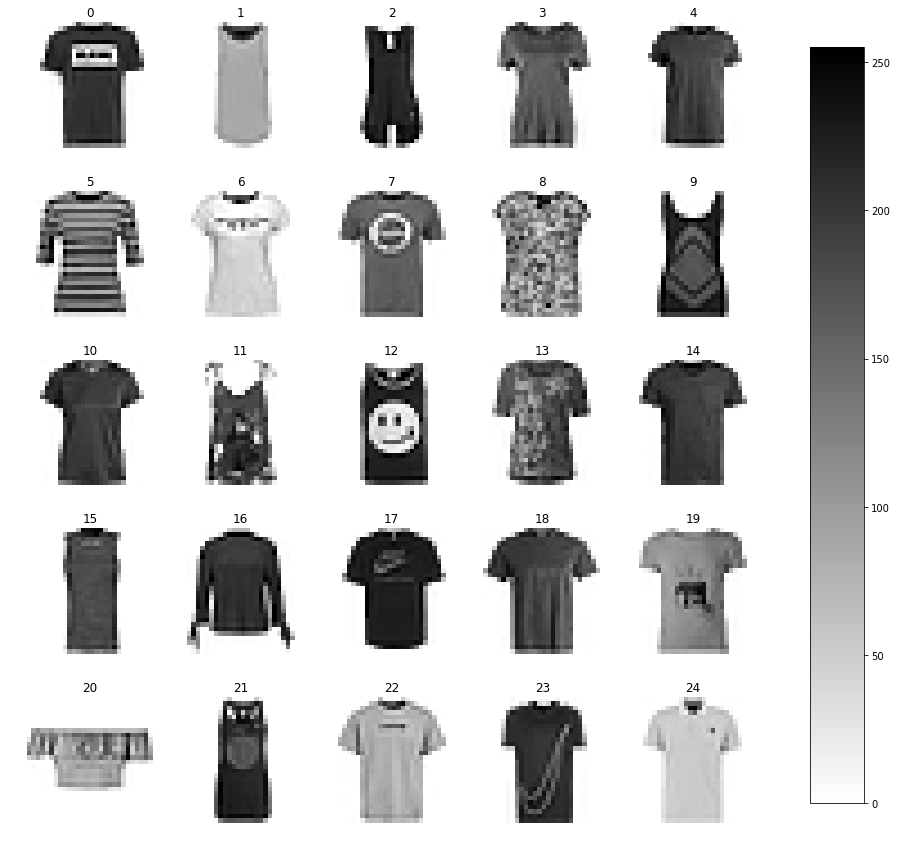

In [20]:
c = 0 # choose one of the classes 0 to 9
# suggested classes to look at : 0 tshirt, 3 dress, 7 shoe

Xc = X[y==c]
llength = int(np.sqrt(X.shape[1])) # get length of x,y for reshape

fig, axs = plt.subplots(5,5, figsize=(15, 15), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(25):
    im = axs[i].imshow(Xc[i].reshape(llength,llength),cmap='gray_r')
    axs[i].set_title(str(i))
    axs[i].axis('off')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

fname = './images/originals.png'
plt.savefig(fname,dpi=300)

variance explained 0.81
reconstruction loss 55916.24


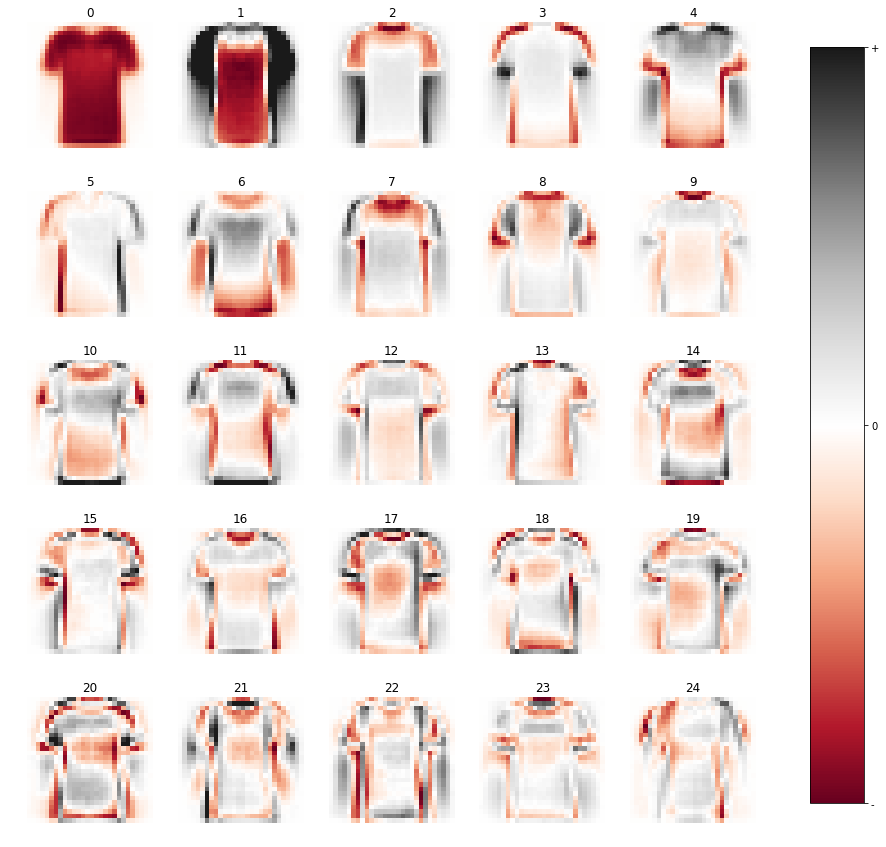

In [21]:
n_components=25
pca = PCA(n_components=n_components, svd_solver='randomized',whiten=True)

pca_encodings = pca.fit_transform(Xc)
pca_codebook = pca.components_.reshape(-1,llength,llength)
pca_reconstruction = pca.inverse_transform(pca_encodings)

fig, axs = plt.subplots(5,5, figsize=(15, 15), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(25):
    vmin = np.min(pca_codebook[i])
    im = axs[i].imshow(pca_codebook[i],cmap='RdGy', vmin=vmin, vmax=-vmin)
    axs[i].set_title(str(i))
    axs[i].axis('off')
    
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax, ticks=[vmin, 0, -vmin])
cbar.ax.set_yticklabels(['-', '0', '+'],fontsize=10) 

fname = './images/pca_25_codebook.png'
plt.savefig(fname,dpi=300)

print(f'variance explained {pca.explained_variance_ratio_.sum():.2f}')
print(f'reconstruction loss {np.linalg.norm(Xc - pca_reconstruction):.2f}' )

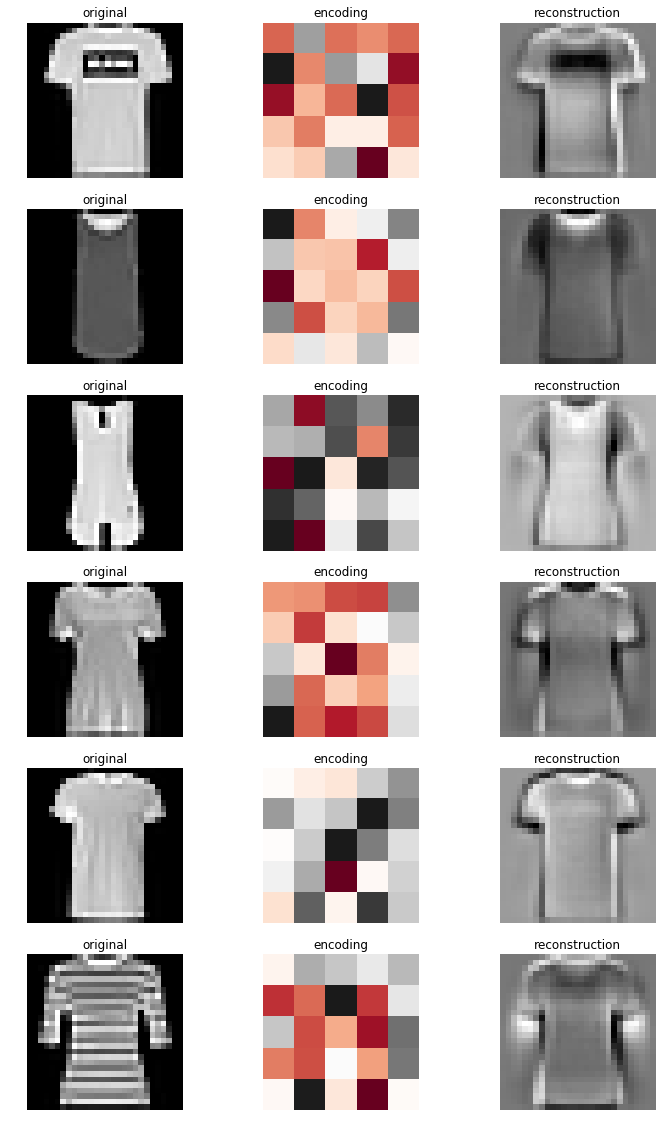

In [22]:
fig, axs = plt.subplots(6,3, figsize=(12,20), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(6):
    orig = axs[i*3].imshow(Xc[i,:].reshape(llength,llength),cmap='gray')
    axs[i*3].title.set_text(f'original'); axs[i*3].axis('off')
    
    encoding = axs[i*3+1].imshow(pca_encodings[i,:].reshape(5,5),cmap='RdGy');
    axs[i*3+1].title.set_text(f'encoding'); axs[i*3+1].axis('off')
    
    reconstruction = axs[i*3+2].imshow((
        pca_encodings[i,:] @ pca.components_).reshape(llength,llength),cmap='gray')
    axs[i*3+2].title.set_text(f'reconstruction'); axs[i*3+2].axis('off')
    
fname = './images/pca_25_encoding_reconstruction.png'
plt.savefig(fname,dpi=300)

59438.57380148931


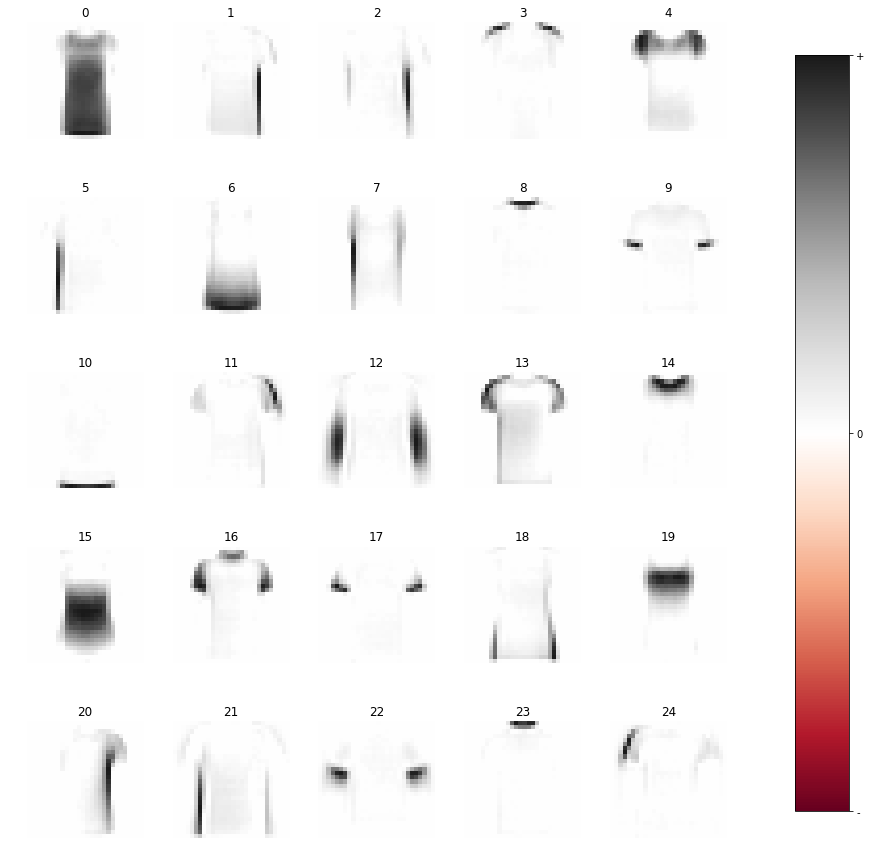

In [23]:
nmf = NMF(n_components=n_components,
          init='nndsvd', 
          tol=1e-9, 
          solver='cd', 
          max_iter=200)

nmf_encodings = nmf.fit_transform(Xc)
nmf_codebook = nmf.components_
nmf_reconstruction = nmf.inverse_transform(nmf_encodings)
nmf_encodings = nmf_encodings.reshape(-1,5,5)
nmf_codebook = nmf_codebook.reshape((-1, llength, llength))

fig, axs = plt.subplots(5,5, figsize=(15, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

for i in range(25):
    vmax = np.max(nmf_codebook[i])
    im = axs[i].imshow(nmf_codebook[i],cmap='RdGy',vmin=-vmax, vmax=vmax)
    axs[i].set_title(str(i))
    axs[i].axis('off')
    
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax, ticks=[-vmax, 0, vmax])
cbar.ax.set_yticklabels(['-', '0', '+'],fontsize=10) 

fname = './images/nmf_25_codebook.png'
plt.savefig(fname,dpi=300)
print(nmf.reconstruction_err_)

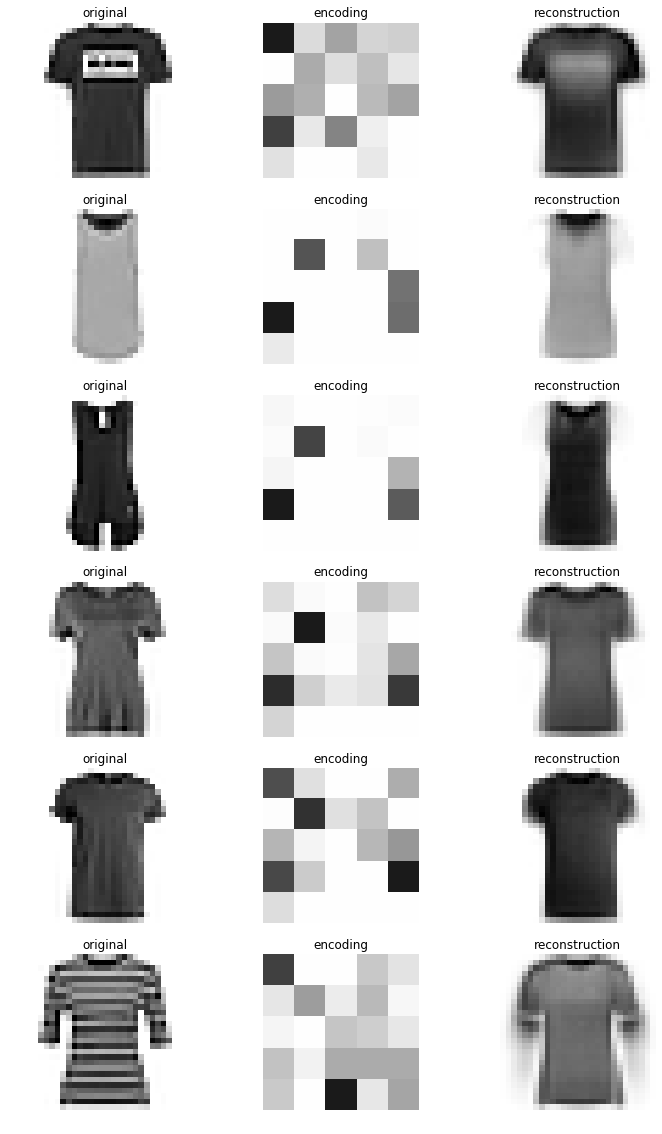

In [24]:
fig, axs = plt.subplots(6,3, figsize=(12,20), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(6):
    orig = axs[i*3].imshow(Xc[i,:].reshape(llength,llength),cmap='gray_r')
    axs[i*3].title.set_text(f'original'); axs[i*3].axis('off')
    
    vmax = np.max(nmf_encodings[i])
    encoding = axs[i*3+1].imshow(nmf_encodings[i],cmap='RdGy',vmin=-vmax,vmax=vmax);
    axs[i*3+1].title.set_text(f'encoding'); axs[i*3+1].axis('off')
    
    reco = axs[i*3+2].imshow(nmf_reconstruction[i].reshape(llength,llength),cmap='gray_r')
    axs[i*3+2].title.set_text(f'reconstruction'); axs[i*3+2].axis('off')
    
fname = './images/nmf_25_encoding_reconstruction.png'
plt.savefig(fname,dpi=300)